# Wczytanie danych

Importujemy dane z plików csv:

In [374]:
import pandas as pd
import tensorflow as tf
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

Usuńmy wszystkie kolumny poza 'text':

In [375]:
fake.pop('subject')
fake.pop('date')
fake.pop('title')
true.pop('subject')
true.pop('date')
true.pop('title')
fake.head()

text
0  Donald Trump just couldn t wish all Americans ...
1  House Intelligence Committee Chairman Devin Nu...
2  On Friday, it was revealed that former Milwauk...
3  On Christmas day, Donald Trump announced that ...
4  Pope Francis used his annual Christmas Day mes...

Dane są teraz w postaci pd.DataFrame – potrzebujemy przekonwertować je na tf.data.Dataset.

In [376]:
size = 20000

fake_texts = [t[0] for t in fake.values]
true_texts = [t[0] for t in true.values]
fake_texts = fake_texts[:int(size/2)]
true_texts = true_texts[:int(size/2)]
dataset = tf.data.Dataset.from_tensor_slices((fake_texts + true_texts, [0] * len(fake_texts) + [1] * len(true_texts)))

Rekordy są teraz ustawione sekwencyjnie, najpierw teksty-fejki, następnie prawdziwe. Ustawmy je w losowej kolejności.

In [377]:
print(dataset)
len(list(dataset))
dataset = dataset.shuffle(len(fake_texts) + len(true_texts), reshuffle_each_iteration=False)

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int32)>


# Podział na zbiór treningowy, testowy i walidacyjny

In [378]:
train_size = int(size * 0.7)
val_size = int(size * 0.15)
test_size = int(size * 0.15)

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)

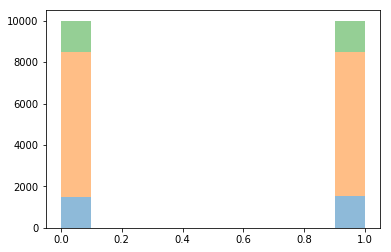

In [379]:
import matplotlib.pyplot as plt
import numpy as np

y_test = np.array([t for i, t in test_dataset])
y_train = np.array([t for i, t in train_dataset])
y_val = np.array([t for i, t in val_dataset])

plt.hist([y_test, y_train, y_val], alpha=0.5, stacked=True)
plt.show()

# Przetwarzanie danych

Nasze datasety to zbiory tekstów (zapisanych po prostu jako string) z odpowiadającymi im klasami. Potrzebujemy zamienić je na wektory możliwie niskiej długości, które będzie można podać na wejściu klasyfikatorów / sieci neuronowych. Do tego celu użyjemy 20-wymiarowego modelu Gnews-Swivel-20-dim (https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1).

In [380]:
import tensorflow_hub as hub

embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)


train_examples_batch, train_labels_batch = next(iter(train_dataset.batch(train_size)))
X_train = hub_layer(train_examples_batch).numpy()
test_examples_batch, test_labels_batch = next(iter(test_dataset.batch(test_size)))
X_test = hub_layer(test_examples_batch).numpy()
val_examples_batch, val_labels_batch = next(iter(val_dataset.batch(val_size)))
X_val = hub_layer(val_examples_batch).numpy()

X_train to teraz zbiór 20-wymiarowych wektorów. Zobaczmy, jak korelują z klasą fake/true różne wymiary.

0 0


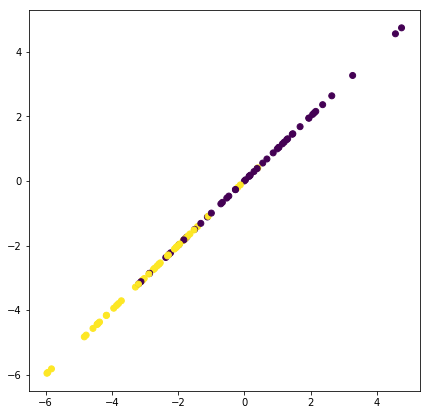

0 1


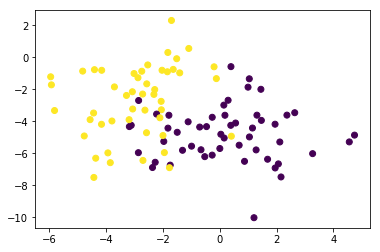

0 2


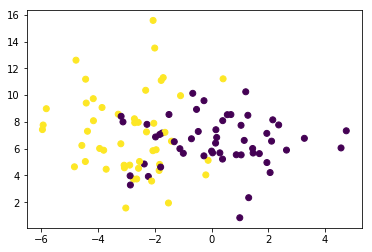

0 3


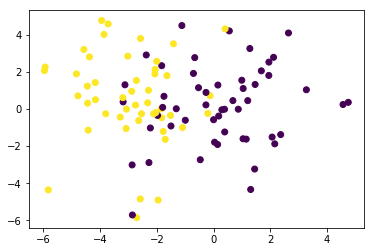

0 4


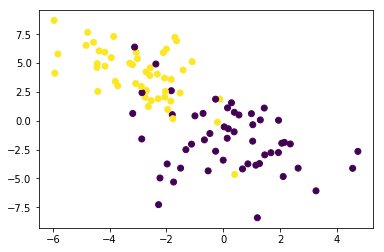

0 5


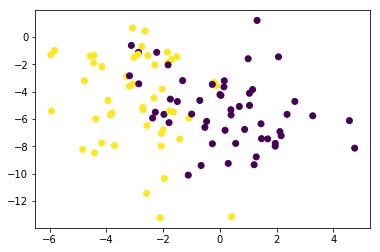

0 6


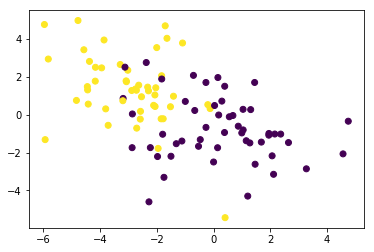

0 7


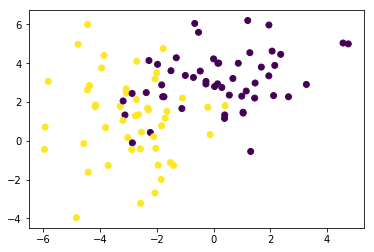

0 8


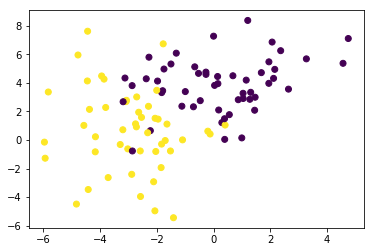

0 9


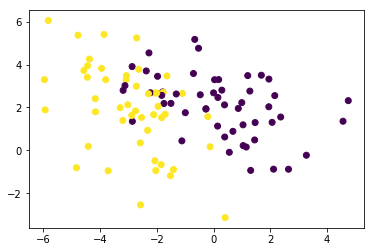

0 10


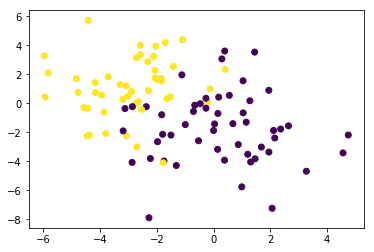

0 11


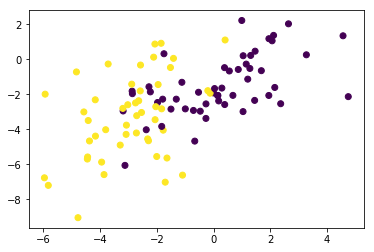

0 12


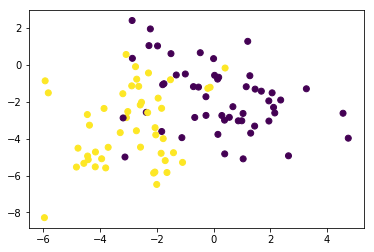

0 13


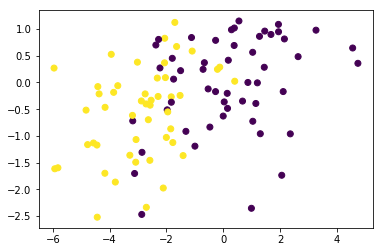

0 14


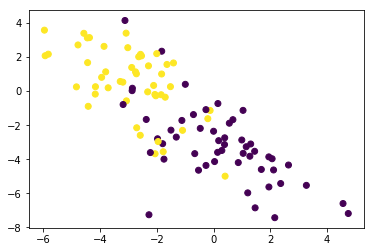

0 15


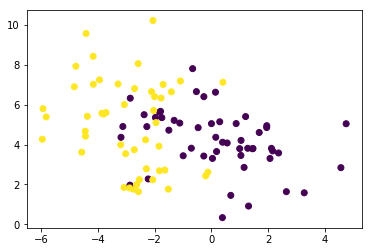

0 16


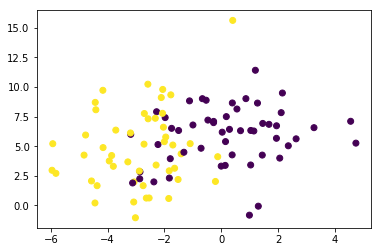

0 17


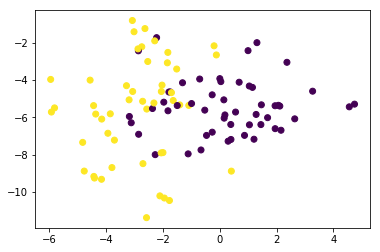

0 18


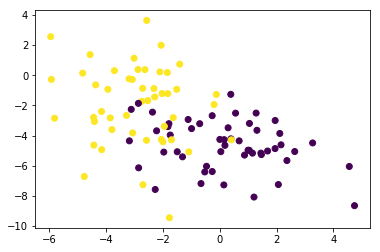

0 19


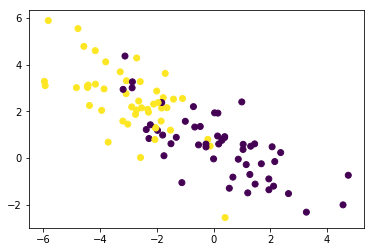

1 1


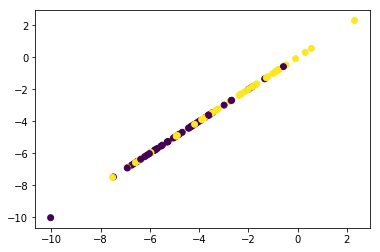

1 2


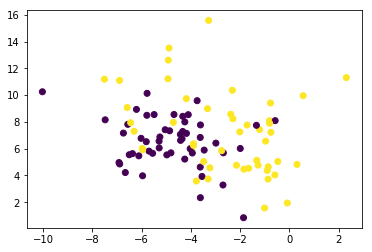

1 3


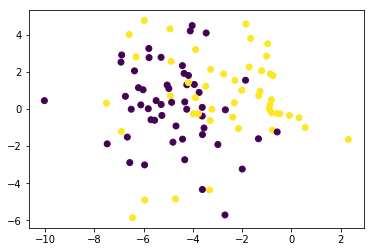

1 4


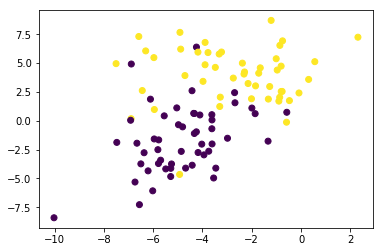

1 5


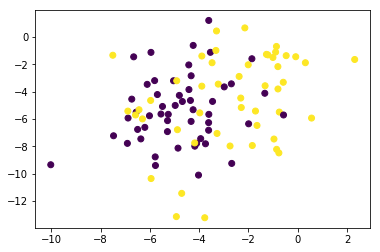

1 6


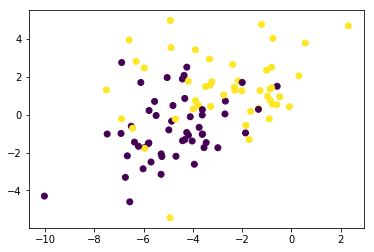

1 7


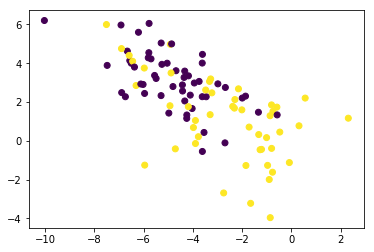

1 8


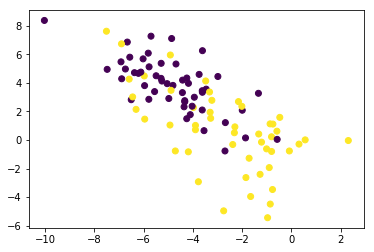

1 9


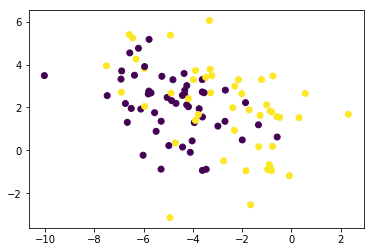

1 10


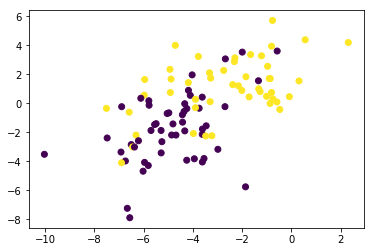

1 11


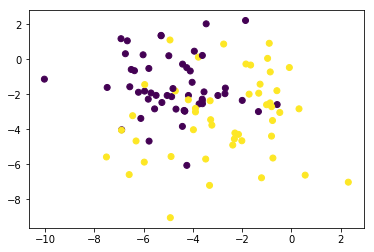

1 12


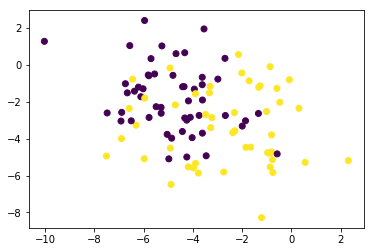

1 13


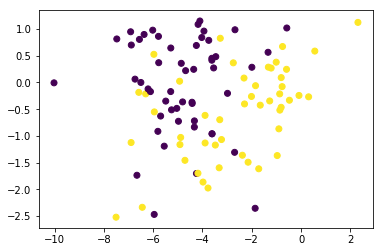

1 14


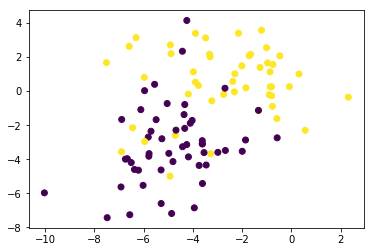

1 15


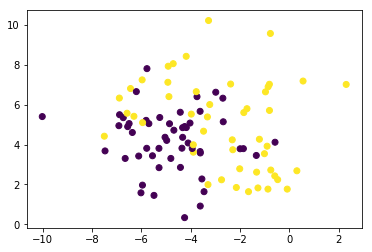

1 16


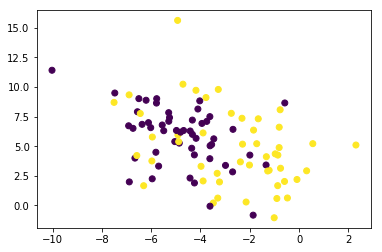

1 17


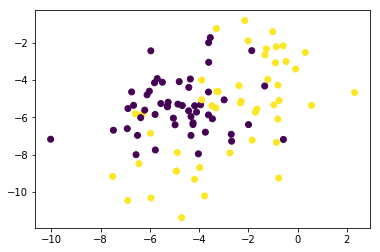

1 18


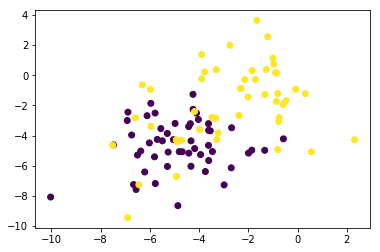

1 19


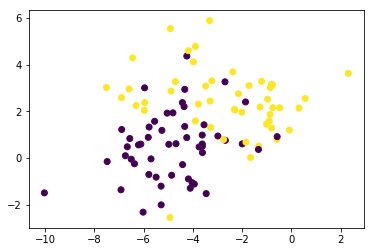

2 2


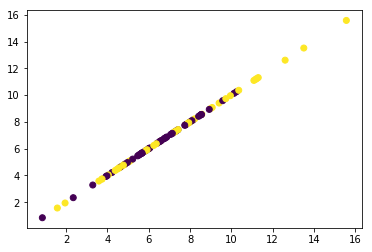

2 3


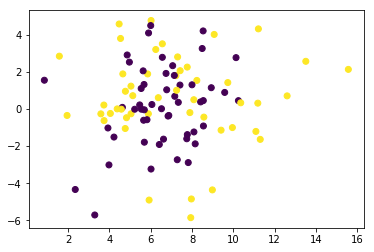

2 4


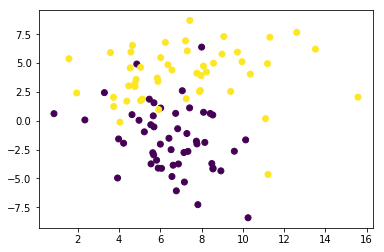

2 5


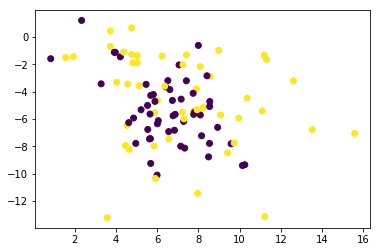

2 6


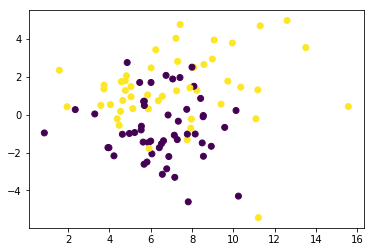

2 7


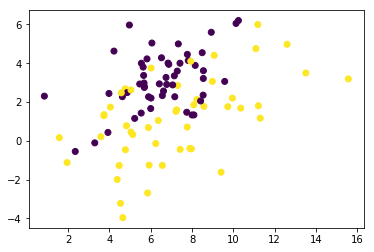

2 8


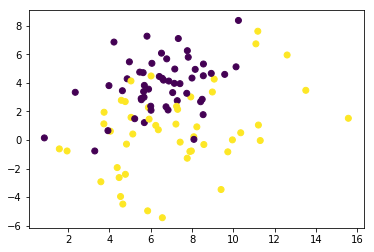

2 9


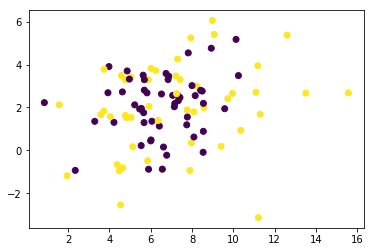

2 10


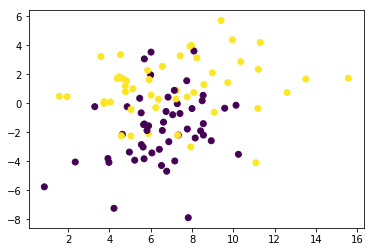

2 11


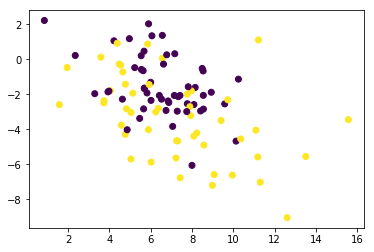

2 12


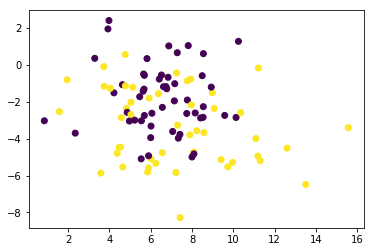

2 13


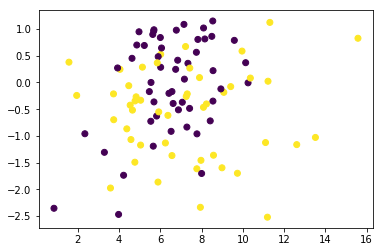

2 14


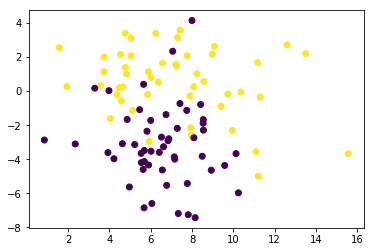

2 15


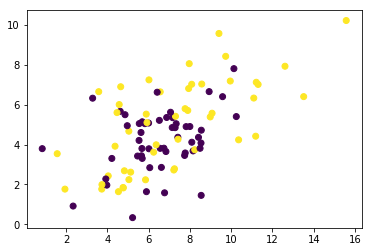

2 16


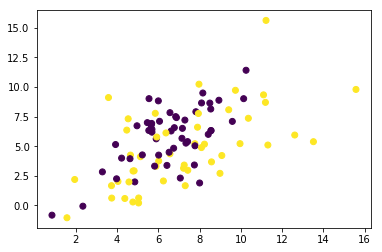

2 17


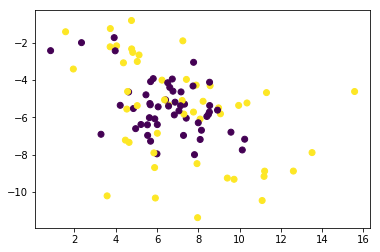

2 18


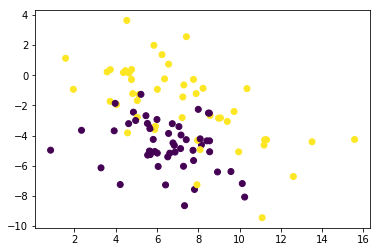

2 19


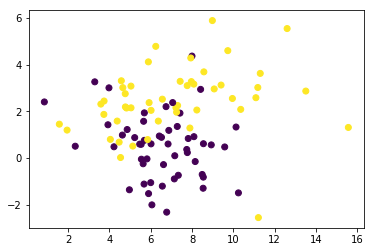

3 3


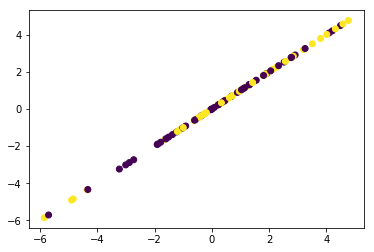

3 4


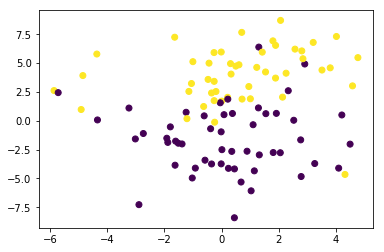

3 5


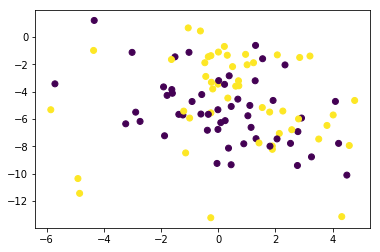

3 6


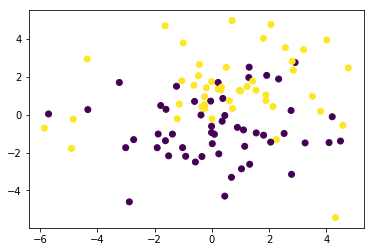

3 7


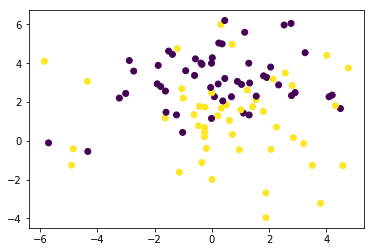

3 8


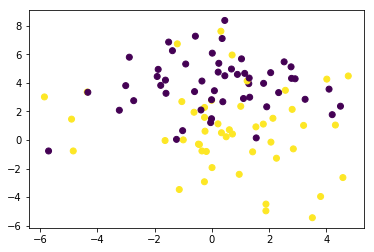

3 9


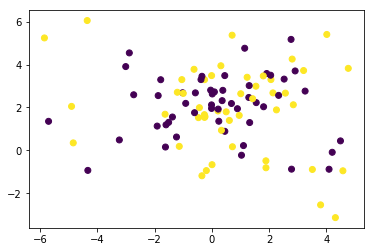

3 10


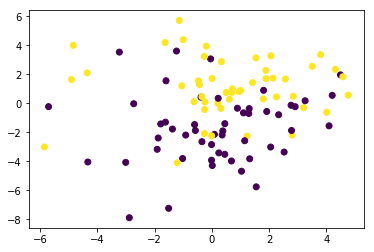

3 11


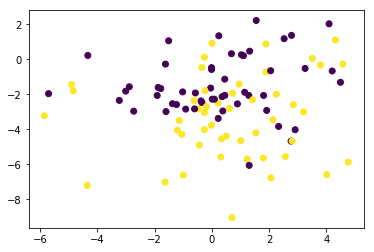

3 12


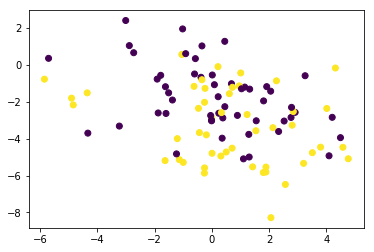

3 13


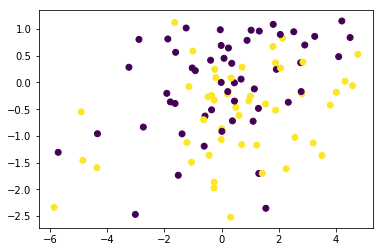

3 14


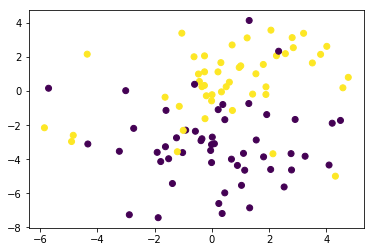

3 15


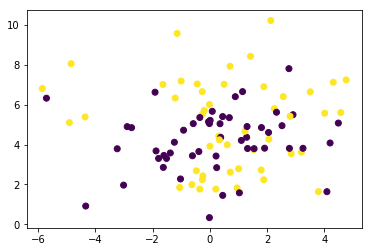

3 16


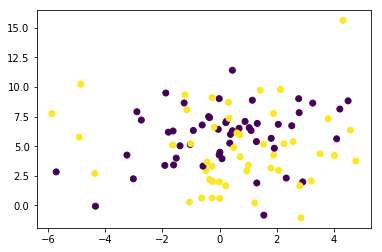

3 17


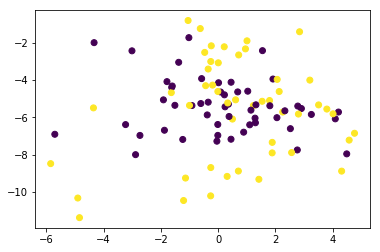

3 18


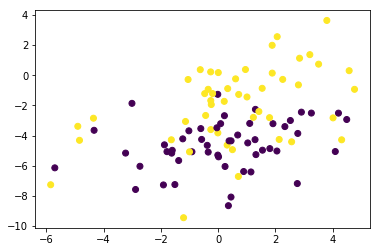

3 19


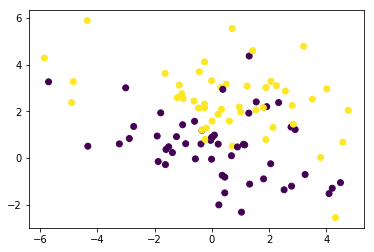

4 4


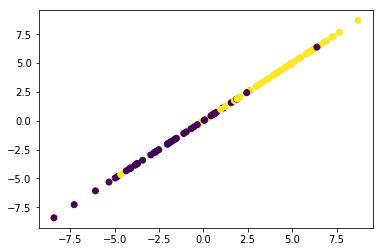

4 5


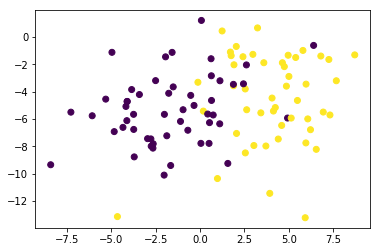

4 6


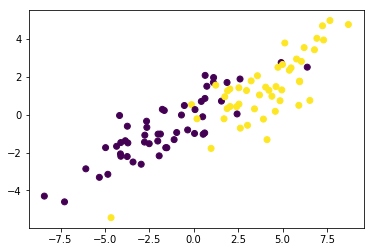

4 7


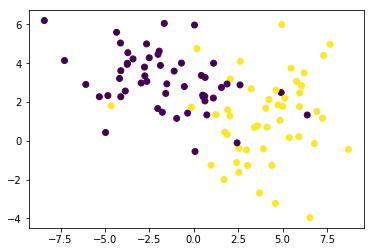

4 8


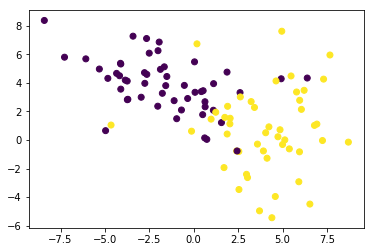

4 9


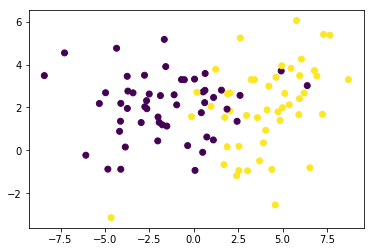

4 10


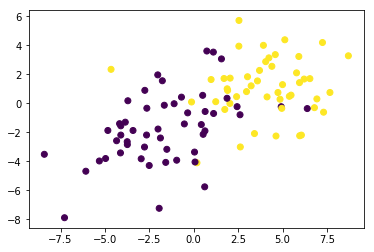

4 11


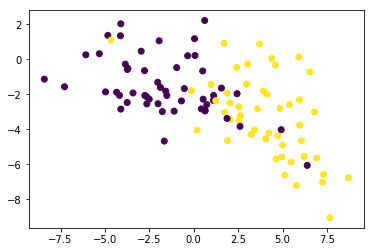

4 12


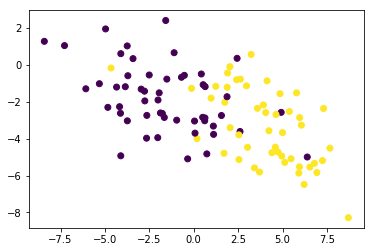

4 13


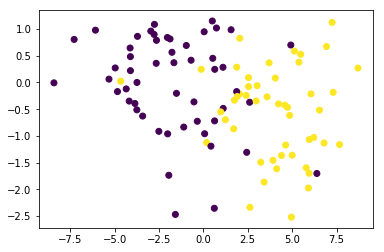

4 14


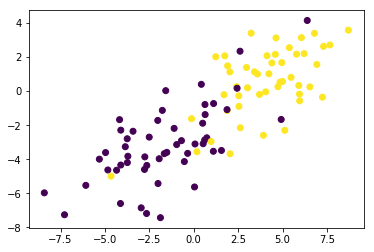

4 15


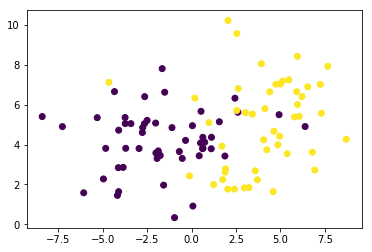

4 16


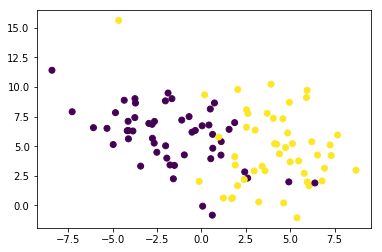

4 17


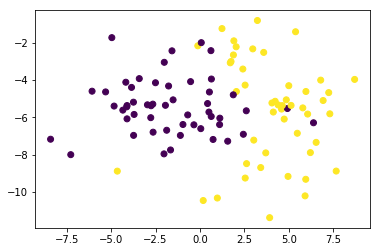

4 18


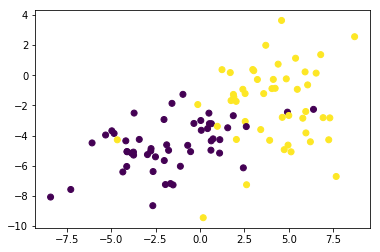

4 19


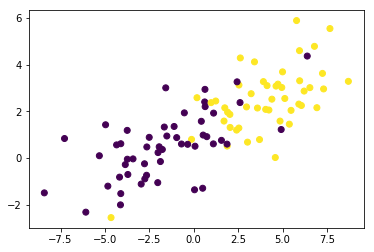

5 5


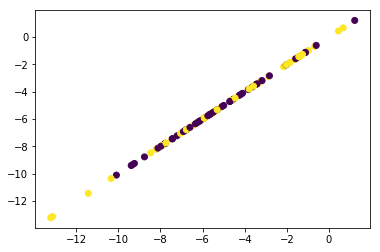

5 6


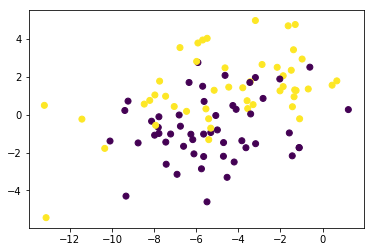

5 7


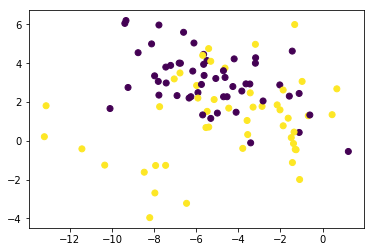

5 8


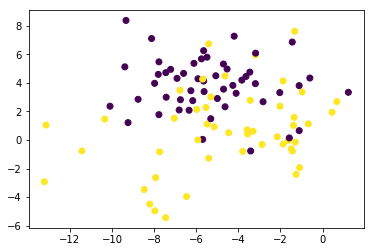

5 9


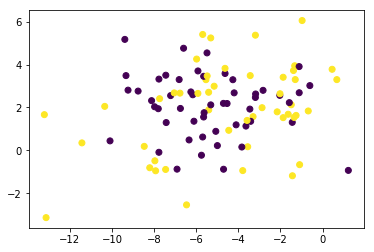

5 10


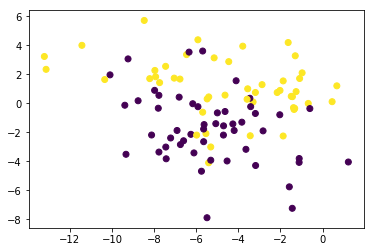

5 11


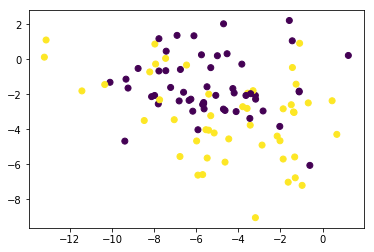

5 12


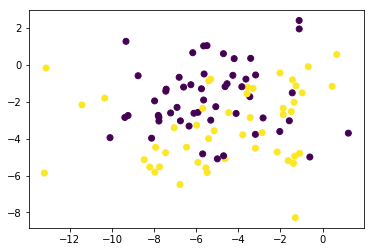

5 13


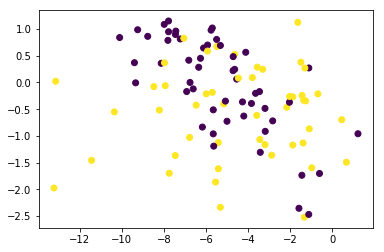

5 14


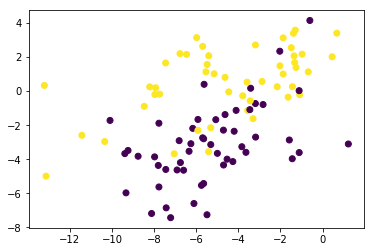

5 15


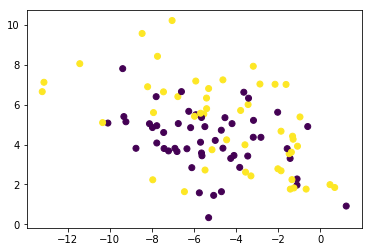

5 16


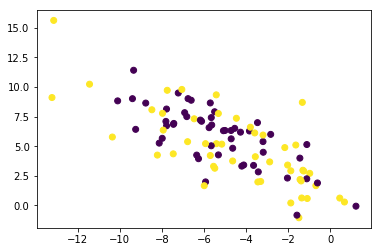

5 17


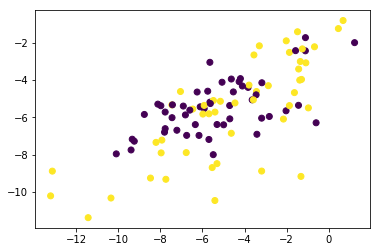

5 18


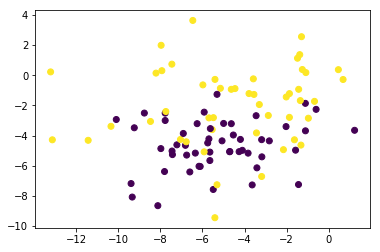

5 19


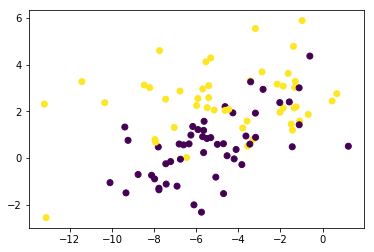

6 6


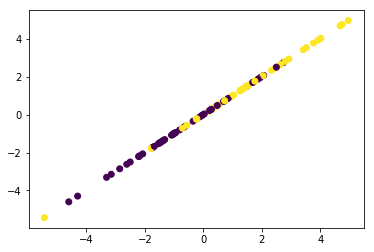

6 7


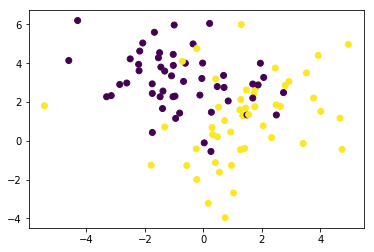

6 8


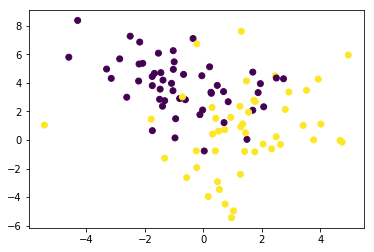

6 9


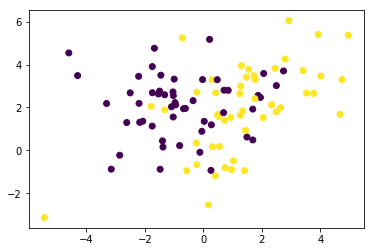

6 10


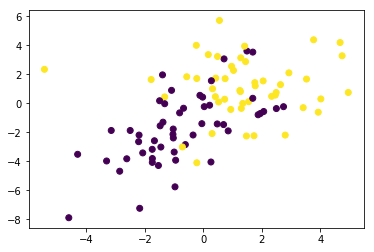

6 11


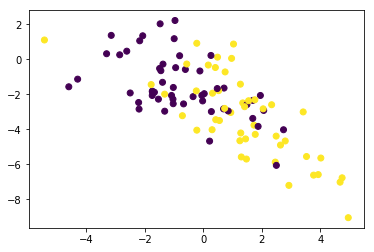

6 12


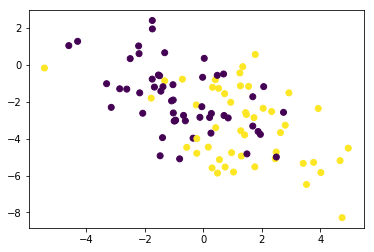

6 13


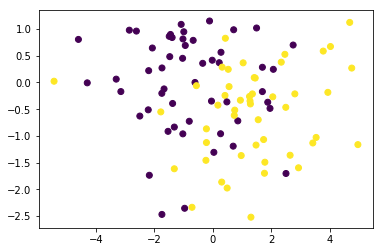

6 14


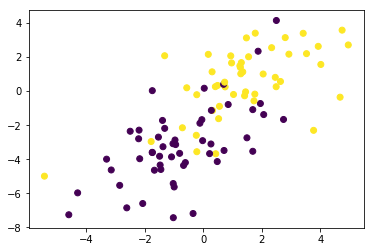

6 15


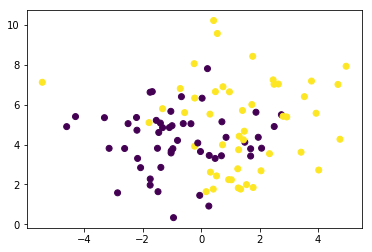

6 16


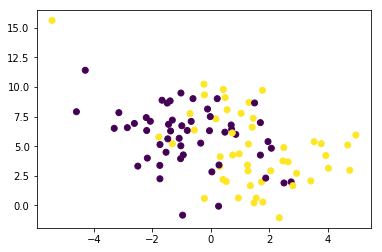

6 17


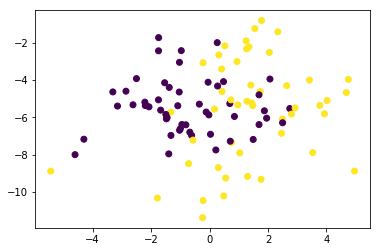

6 18


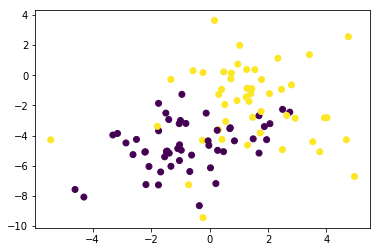

6 19


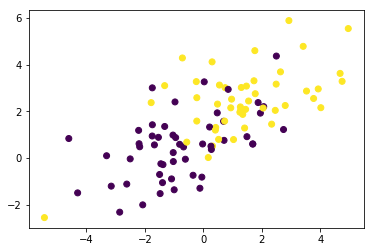

7 7


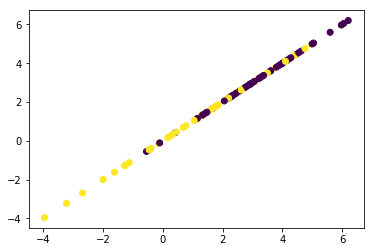

7 8


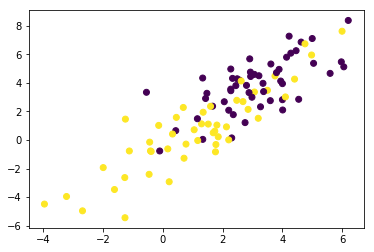

7 9


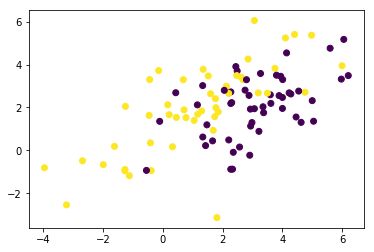

7 10


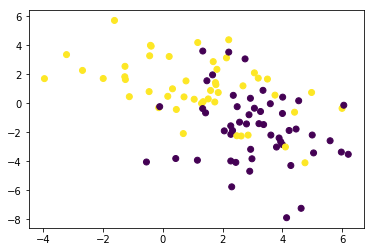

7 11


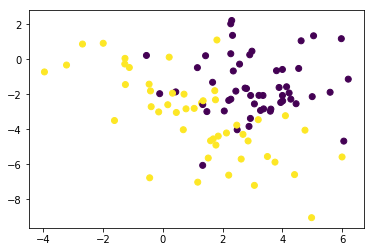

7 12


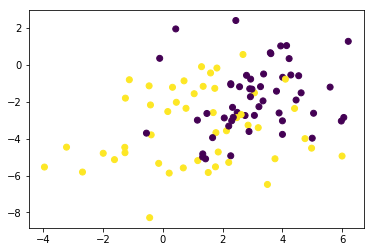

7 13


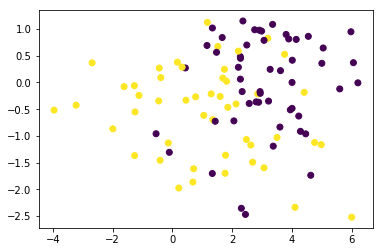

7 14


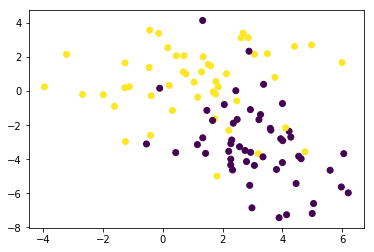

7 15


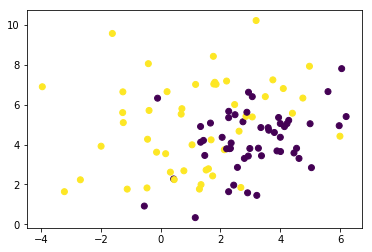

7 16


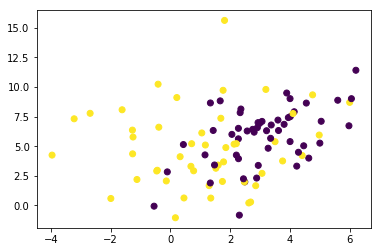

7 17


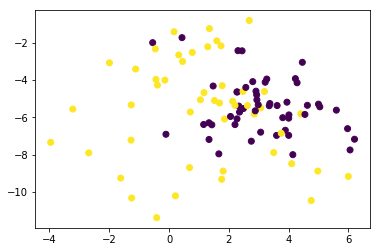

7 18


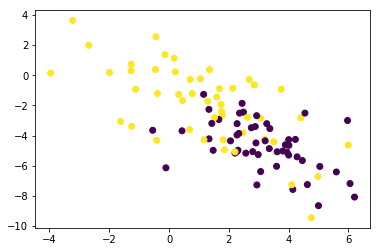

7 19


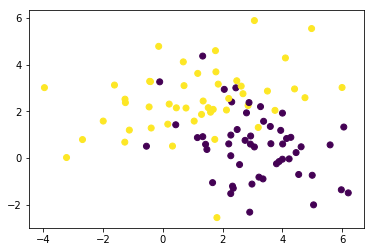

8 8


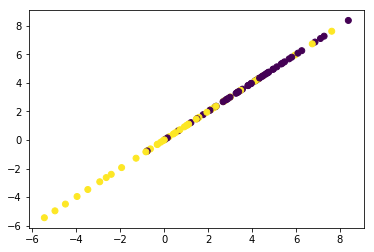

8 9


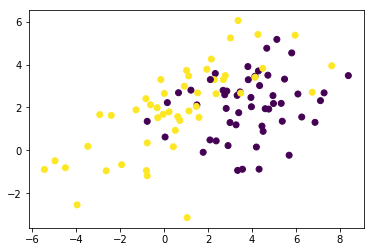

8 10


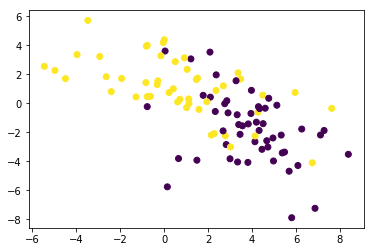

8 11


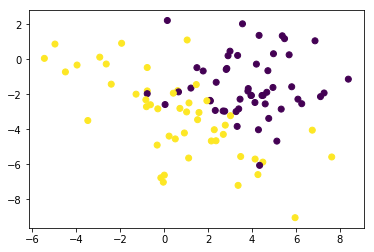

8 12


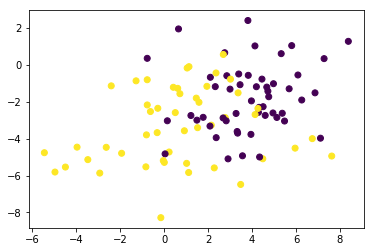

8 13


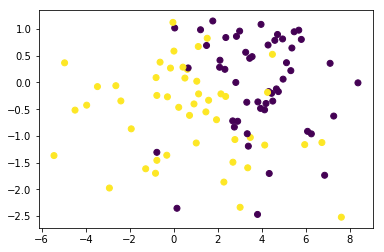

8 14


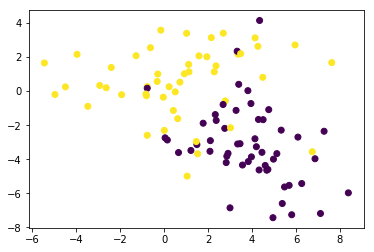

8 15


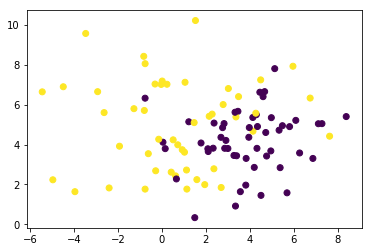

8 16


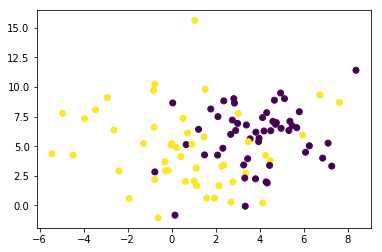

8 17


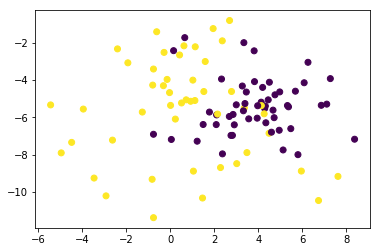

8 18


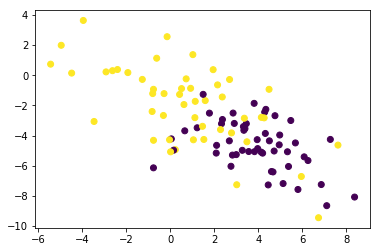

8 19


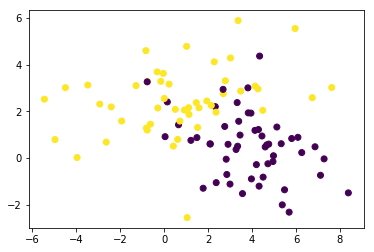

9 9


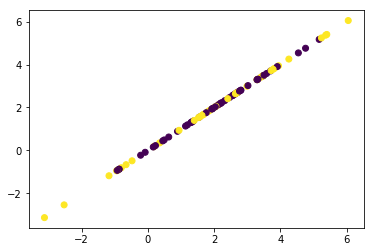

9 10


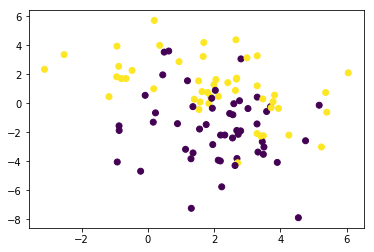

9 11


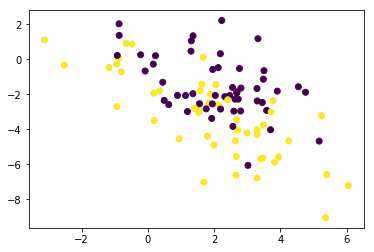

9 12


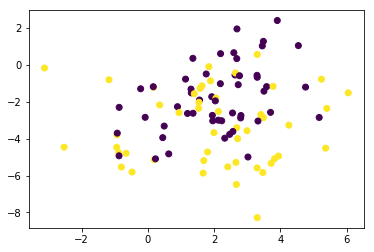

9 13


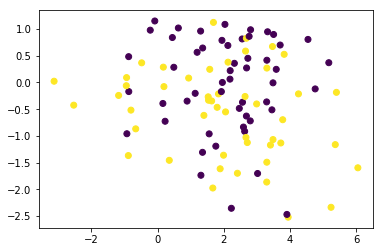

9 14


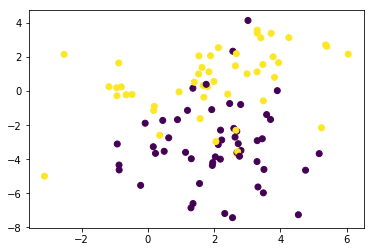

9 15


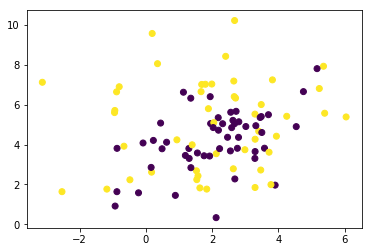

9 16


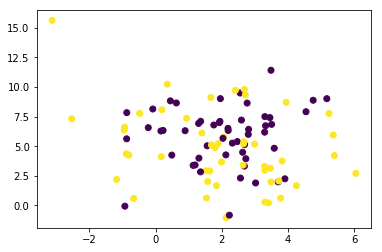

9 17


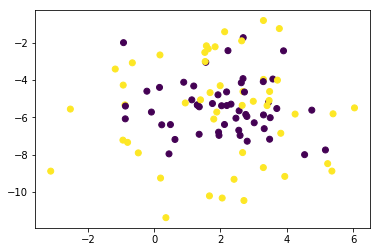

9 18


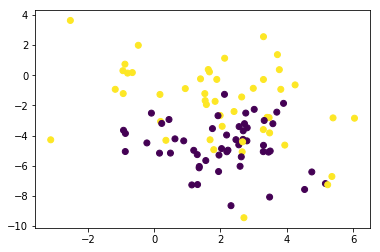

9 19


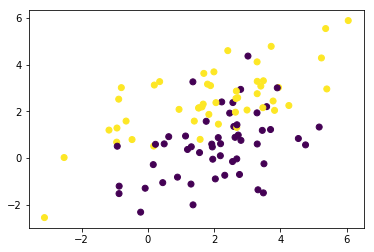

10 10


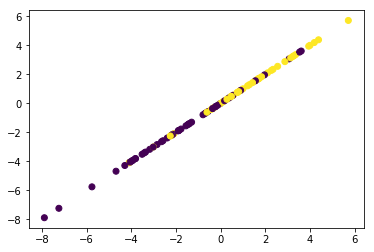

10 11


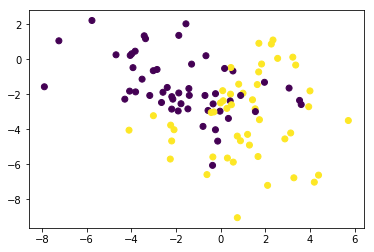

10 12


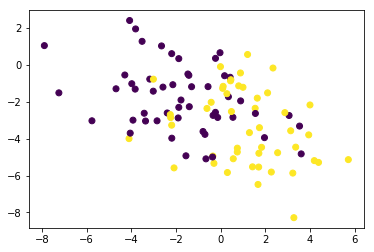

10 13


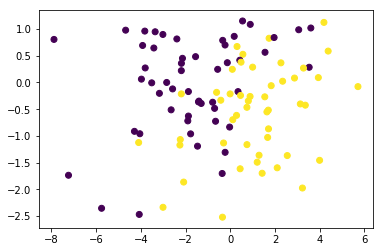

10 14


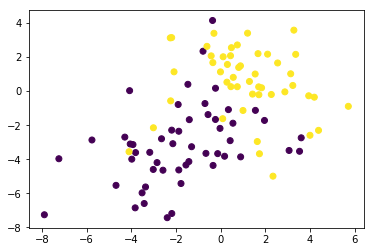

10 15


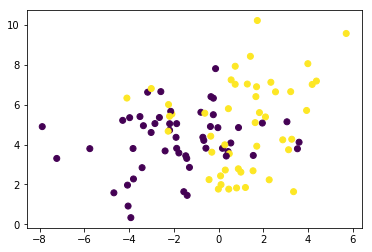

10 16


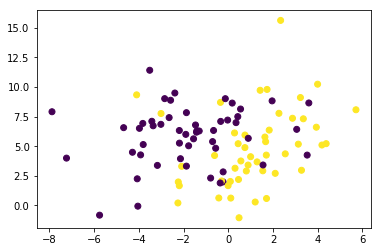

10 17


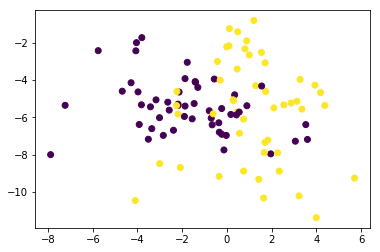

10 18


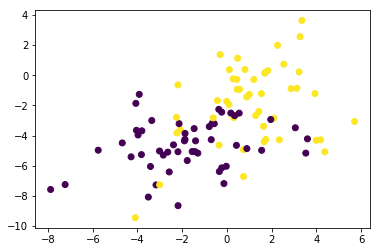

10 19


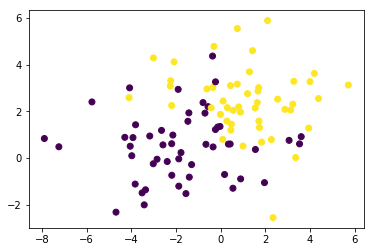

11 11


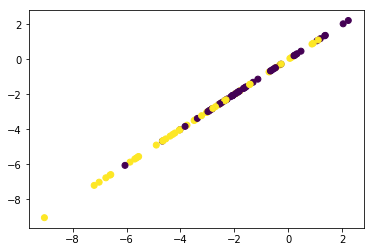

11 12


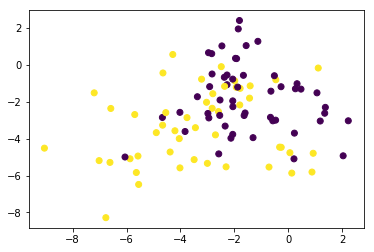

11 13


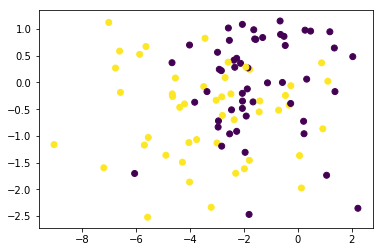

11 14


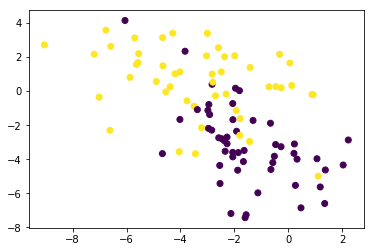

11 15


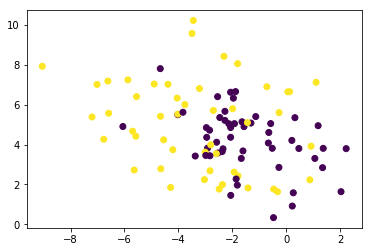

11 16


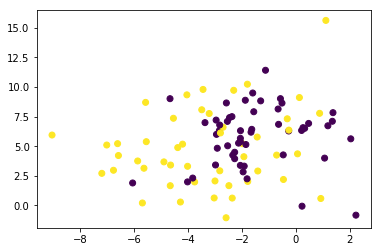

11 17


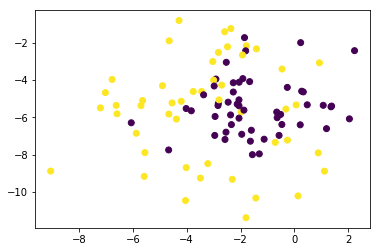

11 18


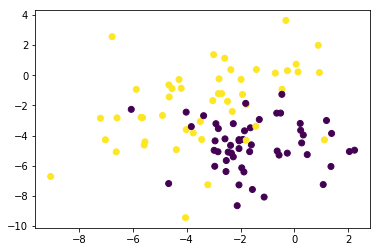

11 19


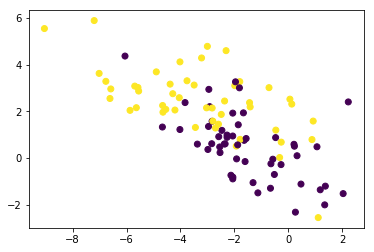

12 12


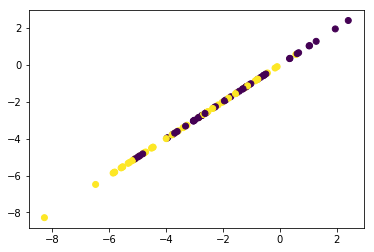

12 13


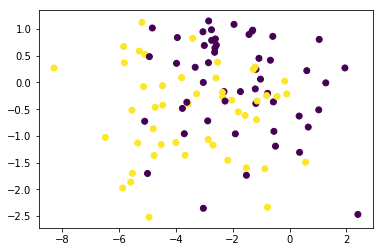

12 14


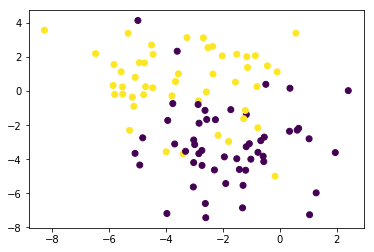

12 15


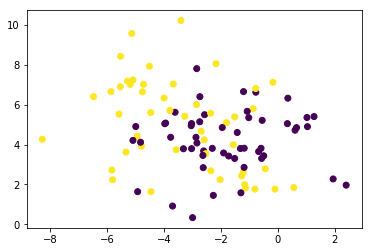

12 16


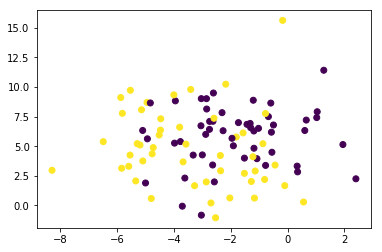

12 17


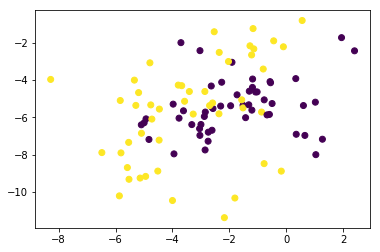

12 18


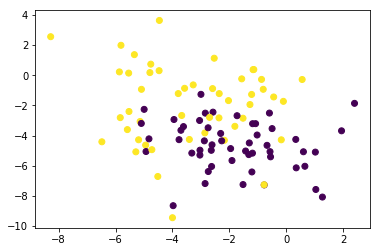

12 19


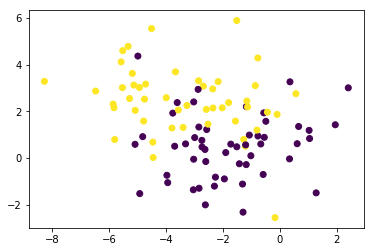

13 13


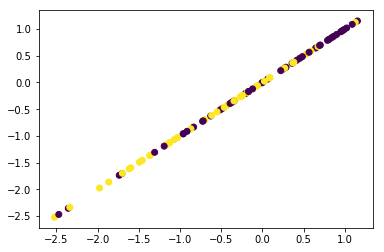

13 14


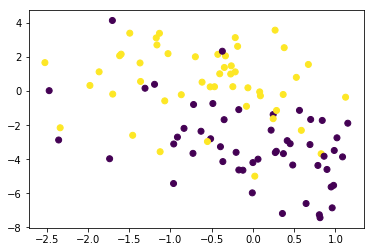

13 15


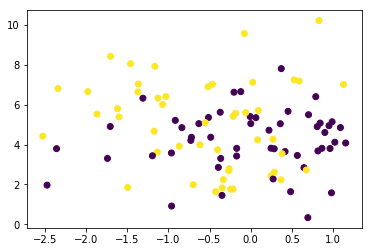

13 16


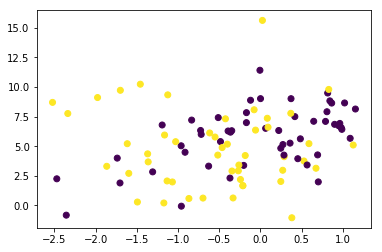

13 17


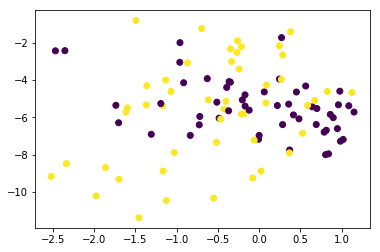

13 18


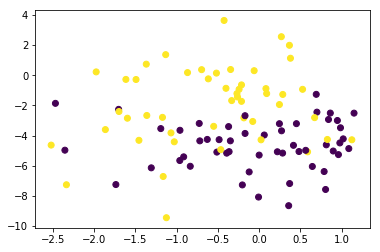

13 19


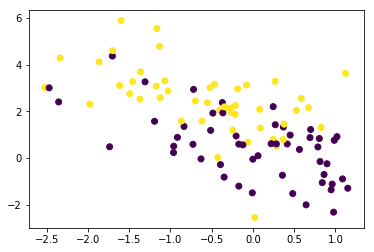

14 14


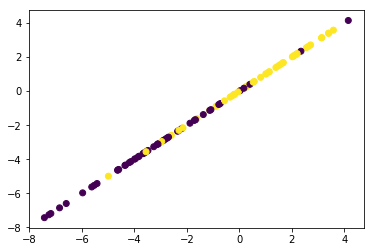

14 15


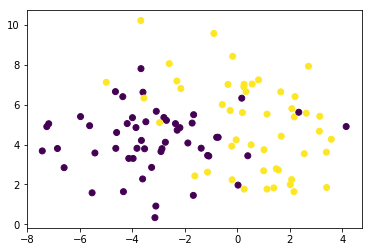

14 16


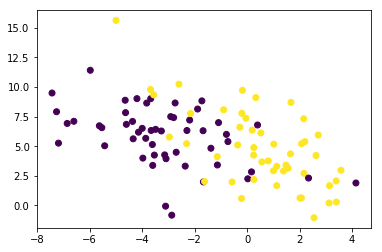

14 17


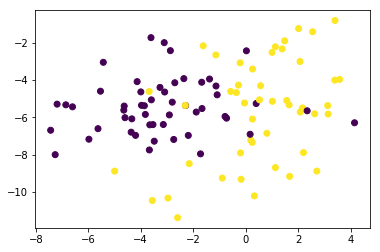

14 18


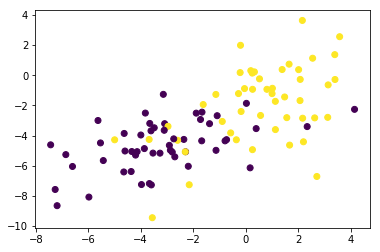

14 19


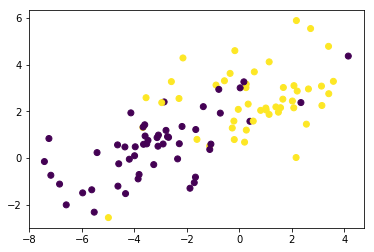

15 15


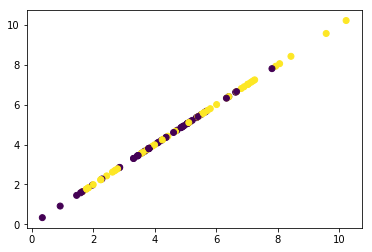

15 16


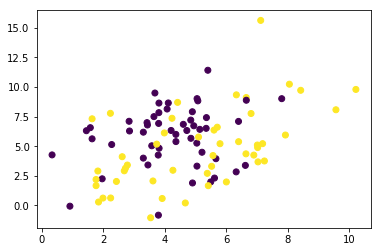

15 17


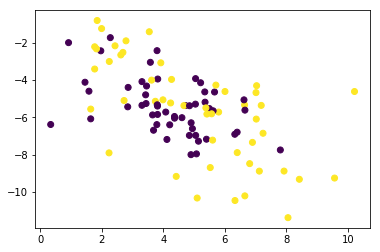

15 18


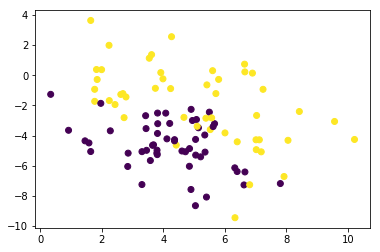

15 19


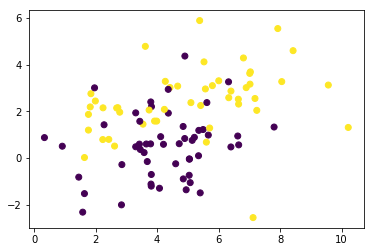

16 16


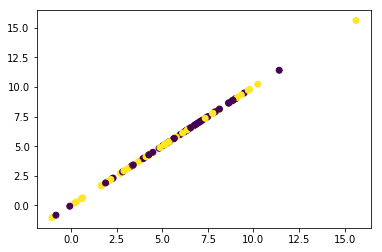

16 17


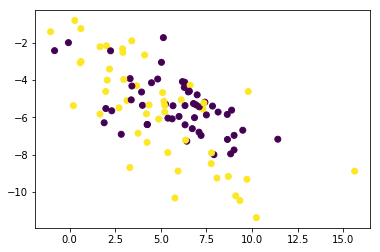

16 18


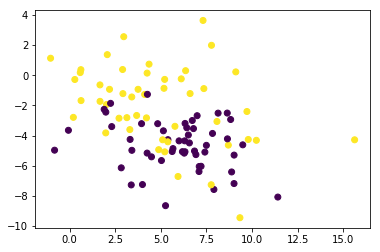

16 19


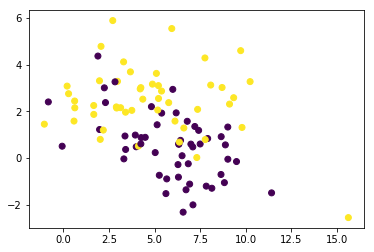

17 17


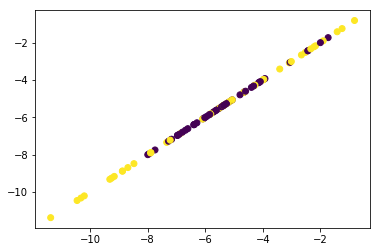

17 18


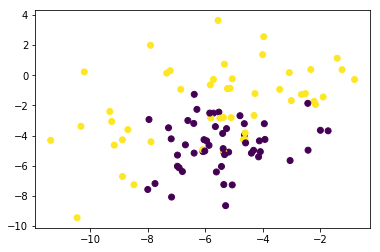

17 19


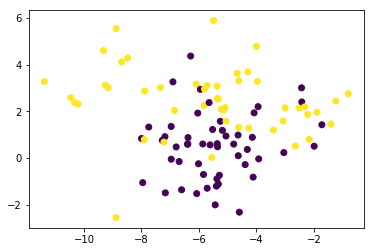

18 18


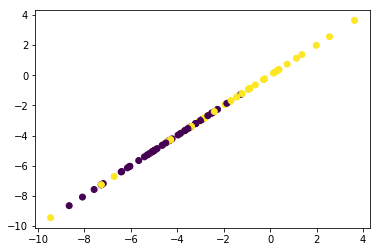

18 19


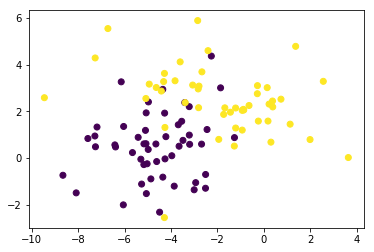

19 19


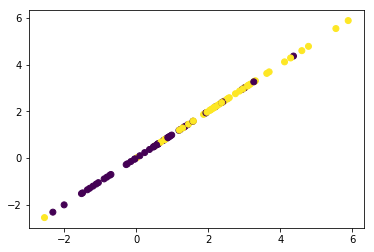

In [381]:
plt.figure(figsize=(7, 7))

for i in range(0,20):
    for j in range(i, 20):
        print(i,j)
        plt.scatter(X_train[:100, i], X_train[:100, j], c=y_train[:100])
        plt.show()

Szczególnie obiecująco wygląda korelacja na wymiarach 4 i 18. Wykorzystamy te dane do nauczenia prostych klasyfikatorów LogisticRegression, DecisionTreeClassifier oraz SVC.

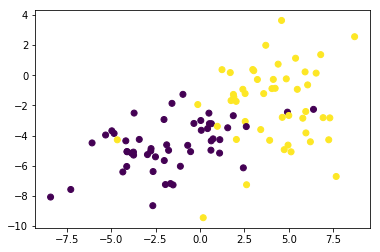

In [382]:
plt.scatter(X_train[:100, 4], X_train[:100, 18], c=y_train[:100])
plt.show()

# LogisticRegression 2D

In [383]:
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train[:,[4,18]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [384]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(log_reg.predict(X_train[:,[4,18]]),y_train))
print(f1_score(log_reg.predict(X_train[:,[4,18]]),y_train))

print(accuracy_score(log_reg.predict(X_test[:,[4,18]]),y_test))
print(f1_score(log_reg.predict(X_test[:,[4,18]]),y_test))

0.8837142857142857
0.8847515220161404
0.8756666666666667
0.8778250900753357


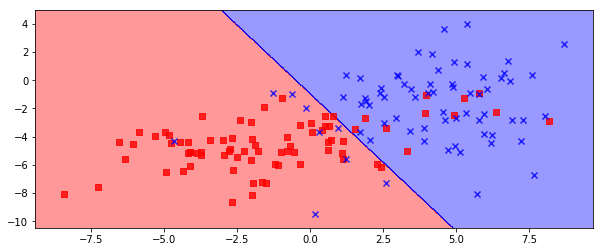

In [385]:
from help_plot import plot_decision_regions
plt.figure(figsize=(10, 4))
plot_decision_regions(X_train[:150,[4,18]], y_train[:150], classifier=log_reg)

# DecisionTreeClassifier 2D

In [386]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=42, criterion='entropy')
tree_clf.fit(X_train[:,[4,18]], y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [387]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(tree_clf.predict(X_train[:,[4,18]]),y_train))
print(f1_score(tree_clf.predict(X_train[:,[4,18]]),y_train))

print(accuracy_score(tree_clf.predict(X_test[:,[4,18]]),y_test))
print(f1_score(tree_clf.predict(X_test[:,[4,18]]),y_test))

0.9317142857142857
0.9301985981308412
0.8343333333333334
0.8319242475481907


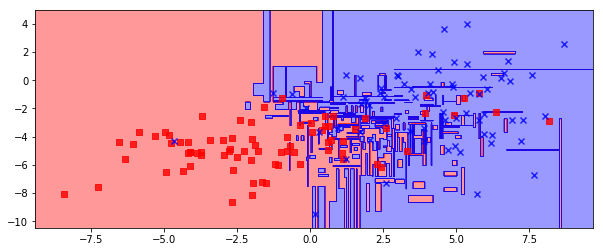

In [388]:
plt.figure(figsize=(10, 4))
plot_decision_regions(X_train[:150,[4,18]], y_train[:150], classifier=tree_clf)


# DecisionTreeClassifier 20D – feature selection

In [389]:
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42, criterion='entropy')
tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [390]:
print(accuracy_score(tree_clf2.predict(X_train), y_train))
print(f1_score(tree_clf2.predict(X_train), y_train))

print(accuracy_score(tree_clf2.predict(X_test),y_test))
print(f1_score(tree_clf2.predict(X_test),y_test))

0.9774285714285714
0.9771709290564947
0.9
0.9005305039787799


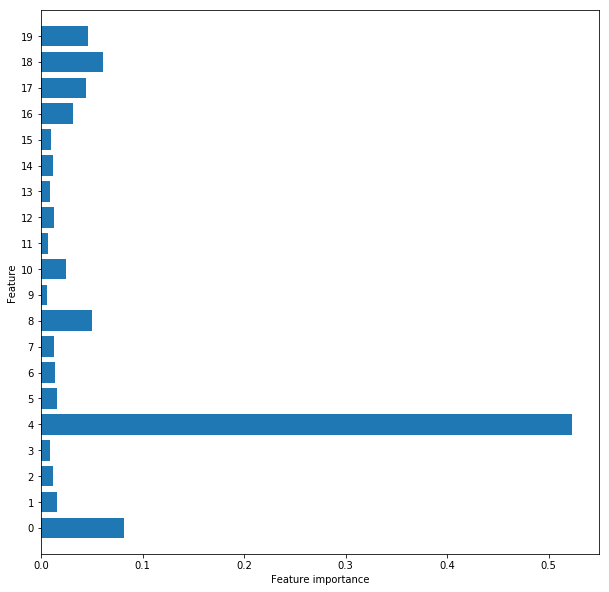

In [391]:
def plot_feature_importances(model):
    n_features = 20
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), range(0,20))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(10, 10))
plot_feature_importances(tree_clf2)
plt.show()

# SVC

In [392]:
from sklearn.svm import SVC
svc_clf = SVC(kernel="poly", degree=3, coef0=1, C=1)
svc_clf.fit(X_train[:,[4,18]], y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [393]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(tree_clf.predict(X_train[:,[4,18]]),y_train))
print(f1_score(tree_clf.predict(X_train[:,[4,18]]),y_train))

print(accuracy_score(tree_clf.predict(X_test[:,[4,18]]),y_test))
print(f1_score(tree_clf.predict(X_test[:,[4,18]]),y_test))

0.9317142857142857
0.9301985981308412
0.8343333333333334
0.8319242475481907


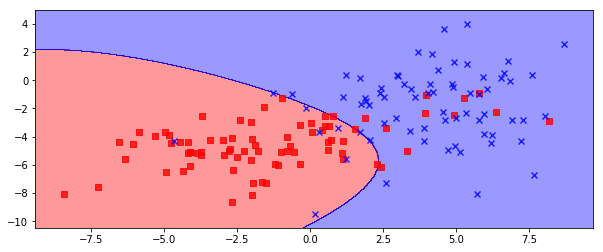

In [394]:
plt.figure(figsize=(10, 4))
plot_decision_regions(X_train[:150,[4,18]], y_train[:150], classifier=svc_clf)

# Tensorflow neural net

Wracamy do reprezentacji próbek na wejściu jako stringów – sieć neuronowa będzie je przekształcać w pierwszej warstwie.

In [395]:
train_examples_batch, train_labels_batch = next(iter(train_dataset.batch(train_size)))
X_train = train_examples_batch.numpy()
test_examples_batch, test_labels_batch = next(iter(test_dataset.batch(test_size)))
X_test = test_examples_batch.numpy()
val_examples_batch, val_labels_batch = next(iter(val_dataset.batch(val_size)))
X_val = val_examples_batch.numpy()

In [396]:
tf.keras.backend.clear_session()

print(X_train.shape)
print(y_train.shape)


def build_model(n_hidden=0, n_neurons=10, trainable=False):
    model = tf.keras.Sequential()
    model.add(hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=trainable))
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam',
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=['accuracy'])
    return model

keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)


(14000,)
(14000,)


In [397]:
from tensorflow.keras.callbacks import EarlyStopping
keras_class.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=1, mode='min', verbose=1)])

Epoch 1/100
438/438 [==============================] - 4s 9ms/step - accuracy: 0.7693 - loss: 0.6266 - val_accuracy: 0.8540 - val_loss: 0.3511
Epoch 2/100
438/438 [==============================] - 4s 8ms/step - accuracy: 0.8747 - loss: 0.3024 - val_accuracy: 0.8773 - val_loss: 0.3036
Epoch 3/100
438/438 [==============================] - 4s 9ms/step - accuracy: 0.8918 - loss: 0.2673 - val_accuracy: 0.8867 - val_loss: 0.2767
Epoch 4/100
438/438 [==============================] - 4s 9ms/step - accuracy: 0.8988 - loss: 0.2469 - val_accuracy: 0.8927 - val_loss: 0.2597
Epoch 5/100
438/438 [==============================] - 4s 9ms/step - accuracy: 0.9046 - loss: 0.2341 - val_accuracy: 0.8990 - val_loss: 0.2490
Epoch 6/100
438/438 [==============================] - 4s 8ms/step - accuracy: 0.9082 - loss: 0.2264 - val_accuracy: 0.9013 - val_loss: 0.2415
Epoch 7/100
438/438 [==============================] - 4s 9ms/step - accuracy: 0.9106 - loss: 0.2211 - val_accuracy: 0.9033 - val_loss: 0.2371

In [373]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": (0, 1, 2),
    "n_neurons": np.arange(1, 50),
    "trainable": (False, True)
}

rnd_search_cv = RandomizedSearchCV(keras_class, param_distribs, n_iter=1, cv=3, verbose=2)
ret = rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=1, mode='min', verbose=1)])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_neurons=1, n_hidden=0, trainable=False ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.7214 - loss: 0.6089 - val_accuracy: 0.8387 - val_loss: 0.3634
Epoch 2/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8641 - loss: 0.3177 - val_accuracy: 0.8763 - val_loss: 0.3018
Epoch 3/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8814 - loss: 0.2850 - val_accuracy: 0.8823 - val_loss: 0.2817
Epoch 4/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8878 - loss: 0.2707 - val_accuracy: 0.8883 - val_loss: 0.2707
Epoch 5/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8923 - loss: 0.2604 - val_accuracy: 0.8957 - val_loss: 0.2623
Epoch 6/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8993 - loss: 0.2531 - val_accuracy: 0.8967 - val_loss: 0.2542
Epoch 7/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.9001 - loss: 0.2471 - val_accuracy: 0.8973 - val_loss: 0.2489

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.4s remaining:    0.0s


Epoch 1/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.6173 - loss: 0.8915 - val_accuracy: 0.8043 - val_loss: 0.4005
Epoch 2/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8437 - loss: 0.3401 - val_accuracy: 0.8567 - val_loss: 0.3114
Epoch 3/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8729 - loss: 0.2960 - val_accuracy: 0.8733 - val_loss: 0.2879
Epoch 4/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8834 - loss: 0.2794 - val_accuracy: 0.8840 - val_loss: 0.2760
Epoch 5/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8892 - loss: 0.2692 - val_accuracy: 0.8917 - val_loss: 0.2679
Epoch 6/100
292/292 [==============================] - 3s 10ms/step - accuracy: 0.8939 - loss: 0.2614 - val_accuracy: 0.8983 - val_loss: 0.2625
Epoch 7/100
292/292 [==============================] - 3s 9ms/step - accuracy: 0.8971 - loss: 0.2549 - val_accuracy: 0.8970 - val_loss: 0.256

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.2min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7a783bc85eb8>, as the constructor either does not set or modifies parameter n_neurons

In [343]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [344]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [345]:
history = model.fit(train_dataset.shuffle(10000).batch(512),
                    epochs=10,
                    validation_data=val_dataset.batch(512),
                    verbose=1)

Epoch 1/10
28/28 [==============================] - 2s 86ms/step - accuracy: 0.8445 - loss: 0.3727 - val_accuracy: 0.9377 - val_loss: 0.1882
Epoch 2/10
28/28 [==============================] - 2s 81ms/step - accuracy: 0.9603 - loss: 0.1226 - val_accuracy: 0.9607 - val_loss: 0.1221
Epoch 3/10
28/28 [==============================] - 2s 81ms/step - accuracy: 0.9779 - loss: 0.0768 - val_accuracy: 0.9693 - val_loss: 0.0964
Epoch 4/10
28/28 [==============================] - 2s 82ms/step - accuracy: 0.9855 - loss: 0.0547 - val_accuracy: 0.9733 - val_loss: 0.0800
Epoch 5/10
28/28 [==============================] - 2s 83ms/step - accuracy: 0.9904 - loss: 0.0404 - val_accuracy: 0.9763 - val_loss: 0.0686
Epoch 6/10
28/28 [==============================] - 2s 84ms/step - accuracy: 0.9939 - loss: 0.0306 - val_accuracy: 0.9803 - val_loss: 0.0610
Epoch 7/10
28/28 [==============================] - 2s 81ms/step - accuracy: 0.9961 - loss: 0.0237 - val_accuracy: 0.9823 - val_loss: 0.0540
Epoch 8/10
28

In [346]:
results = model.evaluate(test_dataset.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

6/6 - 0s - accuracy: 0.9867 - loss: 0.0442
loss: 0.044
accuracy: 0.987
